
**Online Shopping**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_excel('/content/customers.xlsx')
orders = pd.read_excel('/content/orders.xlsx')
order_items = pd.read_excel('/content/order_items.xlsx')
payments = pd.read_excel('/content/payments.xlsx')
products = pd.read_excel('/content/products.xlsx')
sellers = pd.read_excel('/content/sellers.xlsx')
geolocation = pd.read_csv('/content/geolocation.csv')

## **Basic Problem**

---



**1. List all unique cities where customers are located**

In [ ]:
unique_cities = customers[['customer_city']].drop_duplicates()
unique_cities.index = range(1, len(unique_cities) + 1)
unique_cities




,customer_city
1,franca
2,sao bernardo do campo
3,sao paulo
4,mogi das cruzes
5,campinas
...,...
4115,siriji
4116,natividade da serra
4117,monte bonito
4118,sao rafael


**2. Count the number of orders placed in 2017**

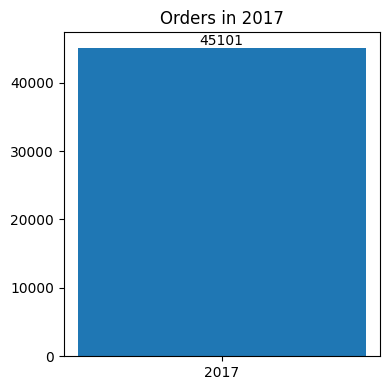

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)

count_2017 = orders[
    orders['order_purchase_timestamp'].dt.year == 2017
].shape[0]

plt.figure(figsize=(4,4))
bars = plt.bar(['2017'], [count_2017])
plt.title('Orders in 2017')
plt.bar_label(bars, labels=[count_2017])
plt.tight_layout()
plt.show()




**3. Find the total sales per category**

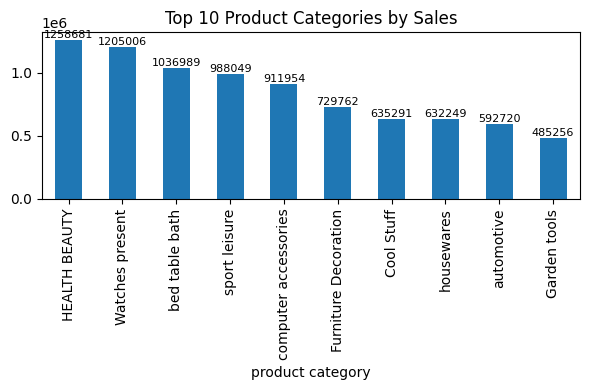

In [ ]:
sales_cat = (
    order_items.merge(products, on='product_id')
    .groupby('product category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(6,4))
bars = sales_cat.plot(kind='bar')
plt.title('Top 10 Product Categories by Sales')
plt.bar_label(bars.containers[0], fmt='%.0f', fontsize=8)
plt.tight_layout()
plt.show()


**4. Calculate the percentage of orders that were paid in installments.**

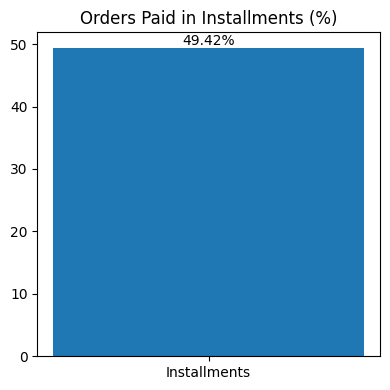

In [ ]:
installment_pct = (
    (payments['payment_installments'] > 1).mean() * 100
)

plt.figure(figsize=(4,4))
bars = plt.bar(['Installments'], [installment_pct])
plt.title('Orders Paid in Installments (%)')
plt.bar_label(bars, fmt='%.2f%%')
plt.tight_layout()
plt.show()



 **5. Count the number of customers from each state.**

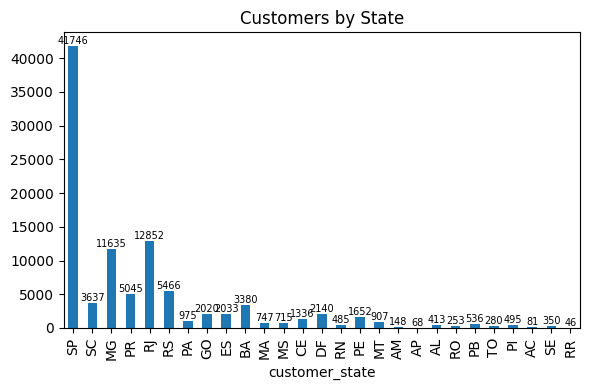

In [ ]:
state_counts = customers['customer_state'].value_counts(sort=False)

plt.figure(figsize=(6,4))
bars = state_counts.plot(kind='bar')
plt.title('Customers by State')
plt.bar_label(bars.containers[0], fontsize=7)
plt.tight_layout()
plt.show()



### **Intermediate Problem**


**1. Calculate the number of orders per month in 2018.**

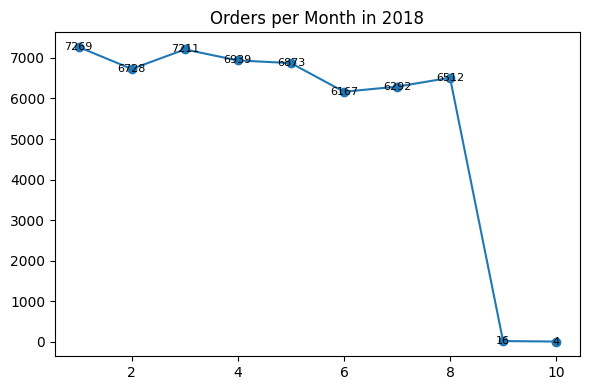

In [ ]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

monthly_orders = (
    orders_2018['order_purchase_timestamp']
    .dt.month
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(6,4))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o')
plt.title('Orders per Month in 2018')
for x, y in zip(monthly_orders.index, monthly_orders.values):
    plt.text(x, y, y, ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()



**2. Find the average number of products per order, grouped by customer city.**

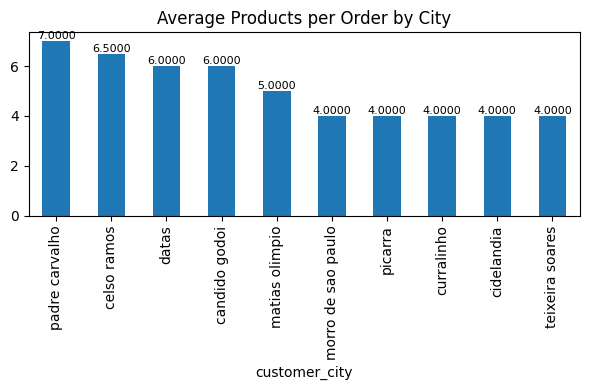

In [ ]:
products_per_order = (
    orders[['order_id','customer_id']]
    .merge(order_items[['order_id','product_id']], on='order_id')
    .groupby(['order_id','customer_id'])
    .size()
    .reset_index(name='products_in_order')
)


city_avg = (
    products_per_order
    .merge(customers[['customer_id','customer_city']], on='customer_id')
    .groupby('customer_city')['products_in_order']
    .mean()
    .sort_values(ascending=False)
)


plt.figure(figsize=(6,4))
bars = city_avg.head(10).plot(kind='bar')
plt.title('Average Products per Order by City')
plt.bar_label(bars.containers[0], fmt='%.4f', fontsize=8)
plt.tight_layout()
plt.show()



**3. Calculate the percentage of total revenue contributed by each product category.**

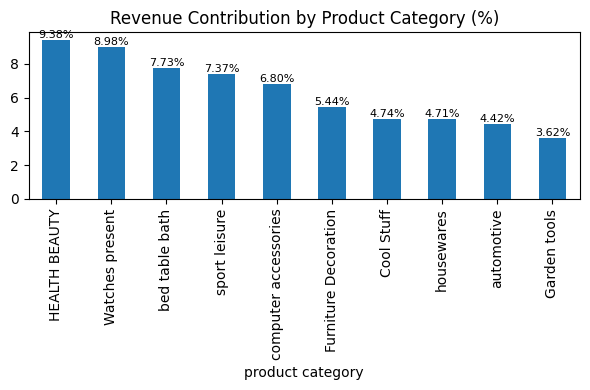

In [ ]:
cat_revenue = (
    order_items.merge(products, on='product_id')
    .groupby('product category')['price']
    .sum()
)
percent_revenue = (cat_revenue / cat_revenue.sum() * 100)\
    .sort_values(ascending=False)\
    .head(10)

plt.figure(figsize=(6,4))
bars = percent_revenue.plot(kind='bar')
plt.title('Revenue Contribution by Product Category (%)')
plt.bar_label(bars.containers[0], fmt='%.2f%%', fontsize=8)
plt.tight_layout()
plt.show()

**4. Identify the correlation between product price and the number of times a product has been purchased.**

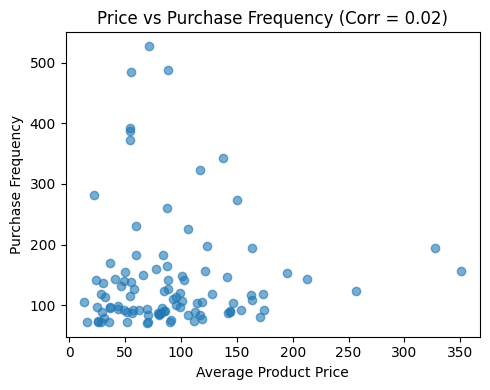

In [ ]:
product_stats = (
    order_items
    .groupby('product_id')
    .agg(
        purchase_frequency=('product_id', 'count'),
        avg_price=('price', 'mean')
    )
    .reset_index()
)

top_products = product_stats.sort_values(
    'purchase_frequency', ascending=False
).head(100)
corr_value = top_products['avg_price'].corr(
    top_products['purchase_frequency']
)


plt.figure(figsize=(5,4))
plt.scatter(
    top_products['avg_price'],
    top_products['purchase_frequency'],
    alpha=0.6
)
plt.title(f'Price vs Purchase Frequency (Corr = {corr_value:.2f})')
plt.xlabel('Average Product Price')
plt.ylabel('Purchase Frequency')
plt.tight_layout()
plt.show()



**5.  Calculate the total revenue generated by each seller, and rank them by revenue.**

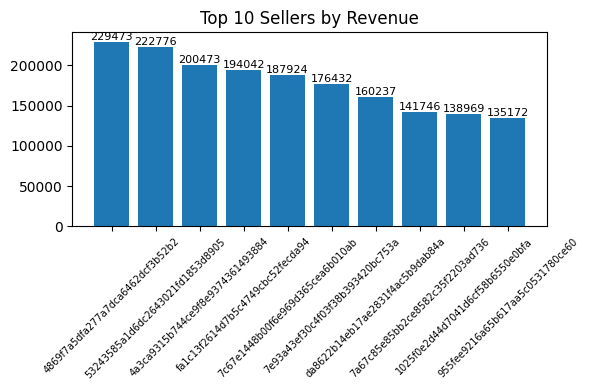

In [ ]:
seller_revenue = (
    order_items.groupby('seller_id')['price']
    .sum()
    .reset_index(name='total_revenue')
    .sort_values('total_revenue', ascending=False)
)

seller_revenue['rank'] = range(1, len(seller_revenue) + 1)

top_sellers = seller_revenue.head(10)

plt.figure(figsize=(6,4))
bars = plt.bar(top_sellers['seller_id'], top_sellers['total_revenue'])
plt.title('Top 10 Sellers by Revenue')
plt.xticks(rotation=45, fontsize=7)
plt.bar_label(bars, fmt='%.0f', fontsize=8)
plt.tight_layout()
plt.show()


# **Advanced Problem**

**1. Calculate the moving average of order values for each customer over their order history.**

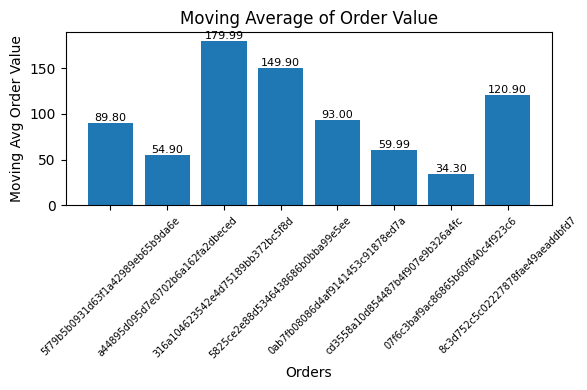

In [ ]:
order_value = (
    order_items.groupby('order_id')['price']
    .sum()
    .reset_index(name='order_value')
)

customer_orders = (
    orders[['order_id', 'customer_id', 'order_purchase_timestamp']]
    .merge(order_value, on='order_id')
    .sort_values(['customer_id', 'order_purchase_timestamp'])
)

customer_orders['moving_avg_order_value'] = (
    customer_orders.groupby('customer_id')['order_value']
    .expanding()
    .mean()
    .reset_index(level=0, drop=True)
)

sample = customer_orders.head(8)

plt.figure(figsize=(6,4))
bars = plt.bar(
    range(len(sample)),
    sample['moving_avg_order_value']
)

plt.title('Moving Average of Order Value')
plt.xlabel('Orders')
plt.ylabel('Moving Avg Order Value')
plt.xticks(range(len(sample)), sample['order_id'], rotation=45, fontsize=7)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=8
    )
plt.tight_layout()
plt.show()

**2. Calculate the cumulative sales per month for each year.**

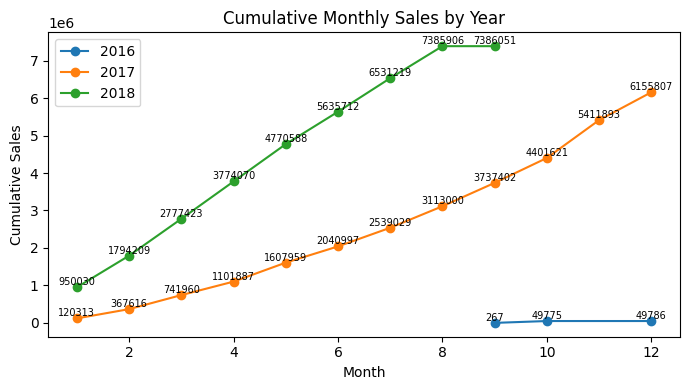

In [ ]:
sales = orders.merge(order_items, on='order_id')

sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'])
sales['year'] = sales['order_purchase_timestamp'].dt.year
sales['month'] = sales['order_purchase_timestamp'].dt.month

monthly_sales = (
    sales.groupby(['year','month'])['price']
    .sum()
    .reset_index()
)

monthly_sales['cumulative_sales'] = (
    monthly_sales.sort_values(['year','month'])
    .groupby('year')['price']
    .cumsum()
)

plt.figure(figsize=(7,4))
for y in sorted(monthly_sales['year'].unique()):
    data = monthly_sales[monthly_sales['year'] == y]
    plt.plot(data['month'], data['cumulative_sales'], marker='o', label=str(y))
    for x, v in zip(data['month'], data['cumulative_sales']):
        plt.text(x, v, f'{v:.0f}', fontsize=7, ha='center', va='bottom')
plt.title('Cumulative Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.legend()
plt.tight_layout()
plt.show()


**3. Calculate the year-over-year growth rate of total sales**

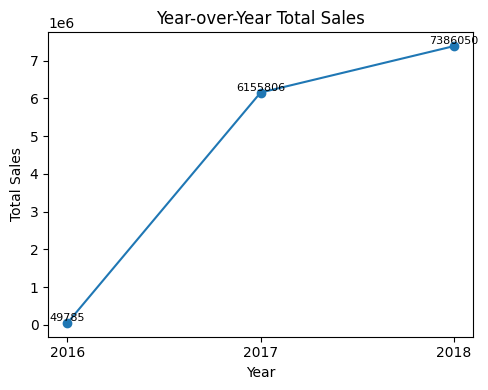

,order_year,price,previous_year_sales,yoy_growth_percentage
0,2016,49785.92,NaN,NaN
1,2017,6155806.98,49785.92,12264.55
2,2018,7386050.80,6155806.98,19.99


In [ ]:
sales = orders.merge(order_items, on='order_id')
sales['order_year'] = sales['order_purchase_timestamp'].dt.year
yearly_sales = (
    sales.groupby('order_year')['price']
    .sum()
    .reset_index()
    .sort_values('order_year')
)


yearly_sales['previous_year_sales'] = yearly_sales['price'].shift(1)
yearly_sales['yoy_growth_percentage'] = (
    (yearly_sales['price'] - yearly_sales['previous_year_sales'])
    / yearly_sales['previous_year_sales'] * 100
).round(2)


plt.figure(figsize=(5,4))
plt.plot(
    yearly_sales['order_year'],
    yearly_sales['price'],
    marker='o'
)
for x, y in zip(yearly_sales['order_year'], yearly_sales['price']):
    plt.text(x, y, f"{int(y)}", ha='center', va='bottom', fontsize=8)
plt.xticks(yearly_sales['order_year'])  # FIXED X-AXIS
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Year-over-Year Total Sales')
plt.tight_layout()
plt.show()
yearly_sales


**4. Calculate the retention rate of customers,defined as the percentage of customer who make another purcahse within 6 month of their purchase.**

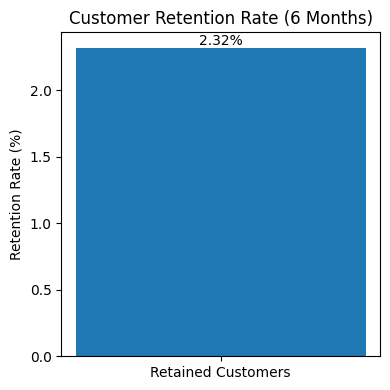

In [ ]:
df = orders.merge(customers, on='customer_id')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['first_order_date'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

df['retained'] = (
    (df['order_purchase_timestamp'] > df['first_order_date']) &
    (df['order_purchase_timestamp'] <= df['first_order_date'] + pd.DateOffset(months=6))
)

total_customers = df['customer_unique_id'].nunique()
retained_customers = df[df['retained']]['customer_unique_id'].nunique()
retention_rate = round((retained_customers / total_customers) * 100, 2)
plt.figure(figsize=(4,4))
plt.bar(['Retained Customers'], [retention_rate])
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Rate (6 Months)')
plt.text(0, retention_rate, f'{retention_rate}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


**5. Identify the top 3 customers who spent the most money in each year.**

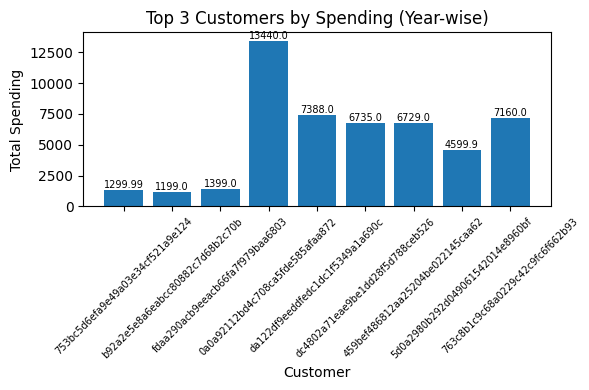

In [ ]:
df = orders.merge(order_items, on='order_id') \
           .merge(customers, on='customer_id')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
customer_year_sales = (
    df.groupby(['order_year', 'customer_unique_id'])['price']
    .sum()
    .reset_index()
)
customer_year_sales['rank'] = (
    customer_year_sales
    .groupby('order_year')['price']
    .rank(method='dense', ascending=False)
)
top3_customers = customer_year_sales[customer_year_sales['rank'] <= 3]

plt.figure(figsize=(6,4))
plt.bar(
    top3_customers['customer_unique_id'].astype(str),
    top3_customers['price']
)

plt.xlabel('Customer')
plt.ylabel('Total Spending')
plt.title('Top 3 Customers by Spending (Year-wise)')
plt.xticks(rotation=45, fontsize=7)
for i, v in enumerate(top3_customers['price']):
    plt.text(i, v, round(v, 2), ha='center', va='bottom', fontsize=7)
plt.tight_layout()
plt.show()
